# 1. Import Necessary Libray

In [83]:
# %%capture 
# # if you using vscode you need to run the command
# pip install stopwords
# pip install flair
# pip install nltk
# pip install swifter

# # if you using google collab you can use this command to install the nevessary library
# !pip install stopwords
# !pip install flair
# !pip install nltk
# !pip install swifter

# 2. Import Library

In [84]:
import pandas as pd
import re

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import PorterStemmer
from nltk import WordNetLemmatizer

import flair
from flair.data import Sentence


import numpy as np
import random as rn

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from collections import Counter
from PIL import Image

# SK LEARN
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pd.options.display.max_rows = None
seed=40

# 3. Import Amazon Reviews Dataset

In [85]:
rn.seed(a=40) # Random Seed

p = 0.1 #  It represents the proportion of data to be included in the subsample, 0.1 mean we get 10%
review = pd.read_csv('./Dataset-Amazon-Product-Review/Reviews.csv', skiprows=lambda i: i > 0 and rn.random() > p) # take data from dataset
review.shape # output total rows and column

(56733, 10)

In [86]:
review.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
1,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
2,26,B001GVISJM,A3FONPR03H3PJS,"Deborah S. Linzer ""Cat Lady""",0,0,5,1288310400,Twizzlers - Strawberry,Product received is as advertised.<br /><br />...
3,41,B001EO5QW8,AQCY5KRO7489S,Garrett,0,0,5,1303430400,Why wouldn't you buy oatmeal from Mcanns? Tast...,The variety packs taste great!<br /><br />I ha...
4,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...
5,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,1334016000,Same stuff,This is the same stuff you can buy at the big ...
6,59,B004N5KULM,A2A7KXM9B4XW90,"P. Kelso ""Amazon all the way!""",0,0,5,1320364800,Awsome - Kids in neighborhood loved us!,"Great product, nice combination of chocolates ..."
7,60,B004N5KULM,A2QOGOXPOVKAJG,mimimc,0,0,5,1320105600,great deal.,"Halloween is over but, I sent a bag to my daug..."
8,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe..."
9,81,B0066DMI6Y,AB30HQTI5VOLR,Melinda Bishop,1,1,5,1325116800,Delicious!,This peppermint stick is delicious and fun to ...


In [87]:

# make a function to determine a score
# 1 means negative
# 0 means positive

def determine_score(score):
    if(score >= 3): 
        return 1
    else:
        return 0

# add new column (Review Score) to the data frame review, so now we have 11 column
review['review_score']= review.Score.apply(determine_score)

# rename text column to be review text
review = review.rename(columns={'Text':'review_text'})

# as you can see from table below, we add new column (review_score) and we replace the column text to be review_text
review.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review_text,review_score
0,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
1,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1
2,26,B001GVISJM,A3FONPR03H3PJS,"Deborah S. Linzer ""Cat Lady""",0,0,5,1288310400,Twizzlers - Strawberry,Product received is as advertised.<br /><br />...,1
3,41,B001EO5QW8,AQCY5KRO7489S,Garrett,0,0,5,1303430400,Why wouldn't you buy oatmeal from Mcanns? Tast...,The variety packs taste great!<br /><br />I ha...,1
4,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,1
5,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,1334016000,Same stuff,This is the same stuff you can buy at the big ...,1
6,59,B004N5KULM,A2A7KXM9B4XW90,"P. Kelso ""Amazon all the way!""",0,0,5,1320364800,Awsome - Kids in neighborhood loved us!,"Great product, nice combination of chocolates ...",1
7,60,B004N5KULM,A2QOGOXPOVKAJG,mimimc,0,0,5,1320105600,great deal.,"Halloween is over but, I sent a bag to my daug...",1
8,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe...",0
9,81,B0066DMI6Y,AB30HQTI5VOLR,Melinda Bishop,1,1,5,1325116800,Delicious!,This peppermint stick is delicious and fun to ...,1


# 3. Analysis and Visualization

## 3.1 Distribution of Number of Review Words

<Axes: xlabel='Num_word_review', ylabel='Count'>

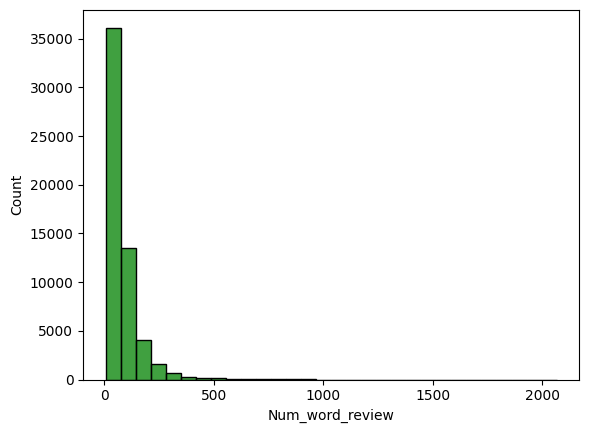

In [88]:
# sns.histplot(data=review, x="review_text", bins=30, color='blue')

review_vis = review.copy()
review_vis['Num_word_review'] = review_vis['review_text'].apply(lambda x:len(str(x).split()))

sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

## 3.2 Distribution of Words in All Review Texts

In [89]:
review_vis['temp_list'] = review_vis['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,162221
1,I,138371
2,and,122481
3,a,115814
4,to,98518
5,of,78365
6,is,71102
7,it,62483
8,for,52010
9,in,50791


## 3.3 Distribution of Reviews in Each Sentiment

<Axes: xlabel='review_score', ylabel='count'>

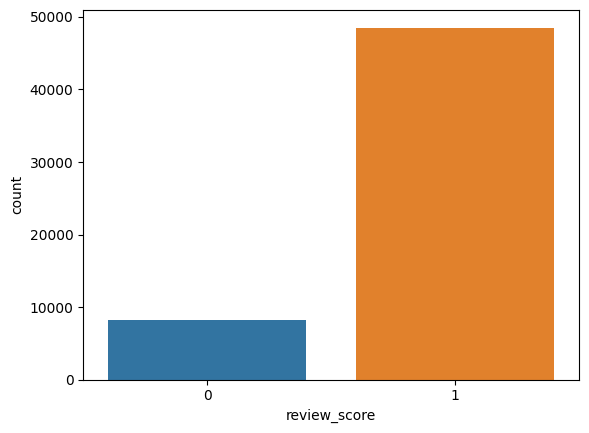

In [90]:
# Do grouping based on review score and review text

grouping = review.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_text',ascending=False)

# Visualize using bar chart
sns.countplot(x='review_score', data=review)

# from bar chart below, we can see that there are more positive sentiment reviews than negative sentiment reviews

# 4. Data proccessing (Cleaning Data)

## 4.1 Before Clean Data

In [91]:
review[['review_text']].head(20)

,review_text
0,This is a confection that has been around a fe...
1,I don't know if it's the cactus or the tequila...
2,Product received is as advertised.<br /><br />...
3,The variety packs taste great!<br /><br />I ha...
4,We really like the McCann's steel cut oats but...
5,This is the same stuff you can buy at the big ...
6,"Great product, nice combination of chocolates ..."
7,"Halloween is over but, I sent a bag to my daug..."
8,"I purchased the Mango flavor, and to me it doe..."
9,This peppermint stick is delicious and fun to ...


## 4.2 Define A Function To Clean The Data

In [92]:
# Function To Cleaning Duplicate Values

def remove_duplicate_values(data):
    data = data.drop_duplicates(keep='first')
    return data

# Function To Remove Some basic characters (include html tag)

def remove_basic_characters(data):
    data = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', data)
    data = re.sub('&gt;', "", data)
    data = re.sub('&#x27;', "'", data)
    data = re.sub('&quot;', '"', data)
    data = re.sub('&#x2F;', ' ', data)
    data = re.sub('&#62;', '', data)
    data = re.sub('</i>', '', data)
    data = re.sub('<p>', ' ', data)
    data = re.sub('<i>', ' ', data)
    data = re.sub('<br>', ' ', data)
    data = re.sub('br', ' ', data)
    data = re.sub("\n", '', data)
    return data

# Function To Remove Number
def remove_number(data):
    data = re.sub(r'\d+', '', data)
    return data

# Function To Remove Punctuation
def remove_punctuation(text):
    data = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return data

# Function To Cleaning White Space
def remove_white_space(data):
    data = re.sub(' +', ' ', data)
    return data

# Function To Remove Symbols
def remove_symbols(data):
    data = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', data)
    return data


# Function To Use Stemming To Normalize Words
def Stemming(data):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(data)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

# Function To Remove Stop words

def remove_stopword(data):
    stop = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    lemma = WordNetLemmatizer()   
    data = [word.lower() for word in data.split() if word.lower() not in stop]
    return " ".join(data)

## 4.3 Combine All The Cleaning Functions

In [93]:
def clean_data(dataFrame, columnName):
    dataFrame[columnName] = dataFrame[columnName].apply(remove_basic_characters) # 1. Remove some basic characters
    dataFrame[columnName] = dataFrame[columnName].str.lower() # 2. change the sentence to lower characters
    dataFrame[columnName] = dataFrame[columnName].apply(remove_number) # 3. remove number in the word
    dataFrame[columnName] = dataFrame[columnName].apply(remove_symbols) # 4. remove symbols in the word
    dataFrame[columnName] = dataFrame[columnName].apply(remove_punctuation) # 5. remove punctuation in the word (':', '?' , '!', etc)
    dataFrame[columnName] = dataFrame[columnName].apply(remove_stopword) # 6. remove stop words, these words, such as "a," "an," "the," "is," "and," etc.
    dataFrame[columnName] = dataFrame[columnName].apply(remove_white_space) # 7. remove white spice from (Hello     World) to be (Hello Word)

clean_data(review, 'review_text')

## 4.4 Result After Cleaning Data

In [94]:
review[['review_text']].head(20)

,review_text
0,confection around centuries light pillowy citr...
1,know cactus tequila unique combination ingredi...
2,product received advertised link
3,variety packs taste great every morning cents ...
4,really like mccann steel cut oats find cook of...
5,stuff buy big box stores nothing healthy carbs...
6,great product nice combination chocolates perf...
7,halloween sent bag daughters class share choco...
8,purchased mango flavor take like mango hint sw...
9,peppermint stick delicious fun eat dad got one...


## 4.5 Distribution of Words in All Review Texts (After Cleaning Data)

In [95]:
review_vis2 = review.copy()

review_vis2['temp_list'] = review_vis2['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,like,25624
1,good,20004
2,taste,17342
3,one,17231
4,great,16743
5,coffee,16248
6,product,15012
7,flavor,14743
8,tea,13534
9,love,12774


### We can see that the word "like", "good", "taste" are the top 3 common words